In [171]:
import pandas as pd
import numpy as np
import math

#df = pd.read_csv('/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_Classification/Data/Cancer_data.csv')
df = pd.read_csv('/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_final DMP/Data/archive/houses_to_rent_v2.csv')
df.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [172]:
# change M & B to 1 and & 0 

#print(df['Class'][0])
i = 0
df = df.drop(columns="city")
for animals in df['animal']:
  if animals == 'acept':
    df['animal'][i] = 1
  else:
    df['animal'][i] = 0
  i = i+1

j = 0
for furn in df['furniture']:
  if furn == 'furnished':
    df['furniture'][j] = 1
  else:
    df['furniture'][j] = 0 
  j = j+1

df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dis

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,51,2,1,0,2,1,0,270,1112,22,17,1421
4,25,1,1,0,1,0,0,0,800,25,11,836


In [178]:
df = df.drop(columns='floor')


In [180]:
#df = df.astype({'floor': 'float64'})
df = df.astype({'animal':'int64'})
df = df.astype({'furniture':'int64'})

df.dtypes

df.head(20)

,area,rooms,bathroom,parking spaces,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2,1,1,1,1,2065,3300,211,42,5618
1,320,4,4,0,1,0,1200,4960,1750,63,7973
2,80,1,1,1,1,0,1000,2800,0,41,3841
3,51,2,1,0,1,0,270,1112,22,17,1421
4,25,1,1,0,0,0,0,800,25,11,836
5,376,3,3,7,1,0,0,8000,834,121,8955
6,72,2,1,0,1,0,740,1900,85,25,2750
7,213,4,4,4,1,0,2254,3223,1735,41,7253
8,152,2,2,1,1,1,1000,15000,250,191,16440
9,35,1,1,0,1,1,590,2300,35,30,2955


                     Correlations
Index                            
total (R$)               1.000000
hoa (R$)                 0.955024
rent amount (R$)         0.264490
fire insurance (R$)      0.254911
property tax (R$)        0.218344
bathroom                 0.208339
parking spaces           0.148684
rooms                    0.134597
area                     0.051799
furniture                0.037781
animal                  -0.007143


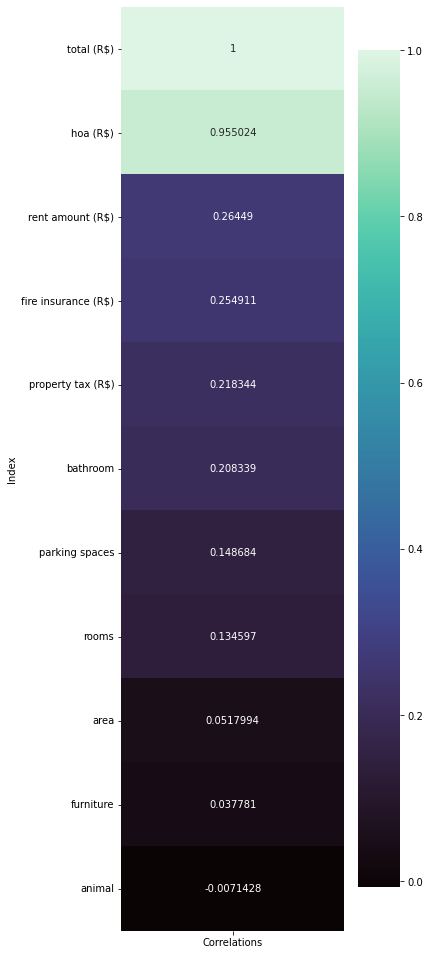

In [181]:
import seaborn as sns 
import matplotlib.pyplot as plt



corr = df.corrwith(df['total (R$)']).reset_index()
corr.columns = ['Index', 'Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by = ['Correlations'], ascending= False)
plt.figure(figsize=(5,17))
print(corr)
fig = sns.heatmap(corr, annot= True, fmt = 'g', cmap= 'mako')
plt.show()


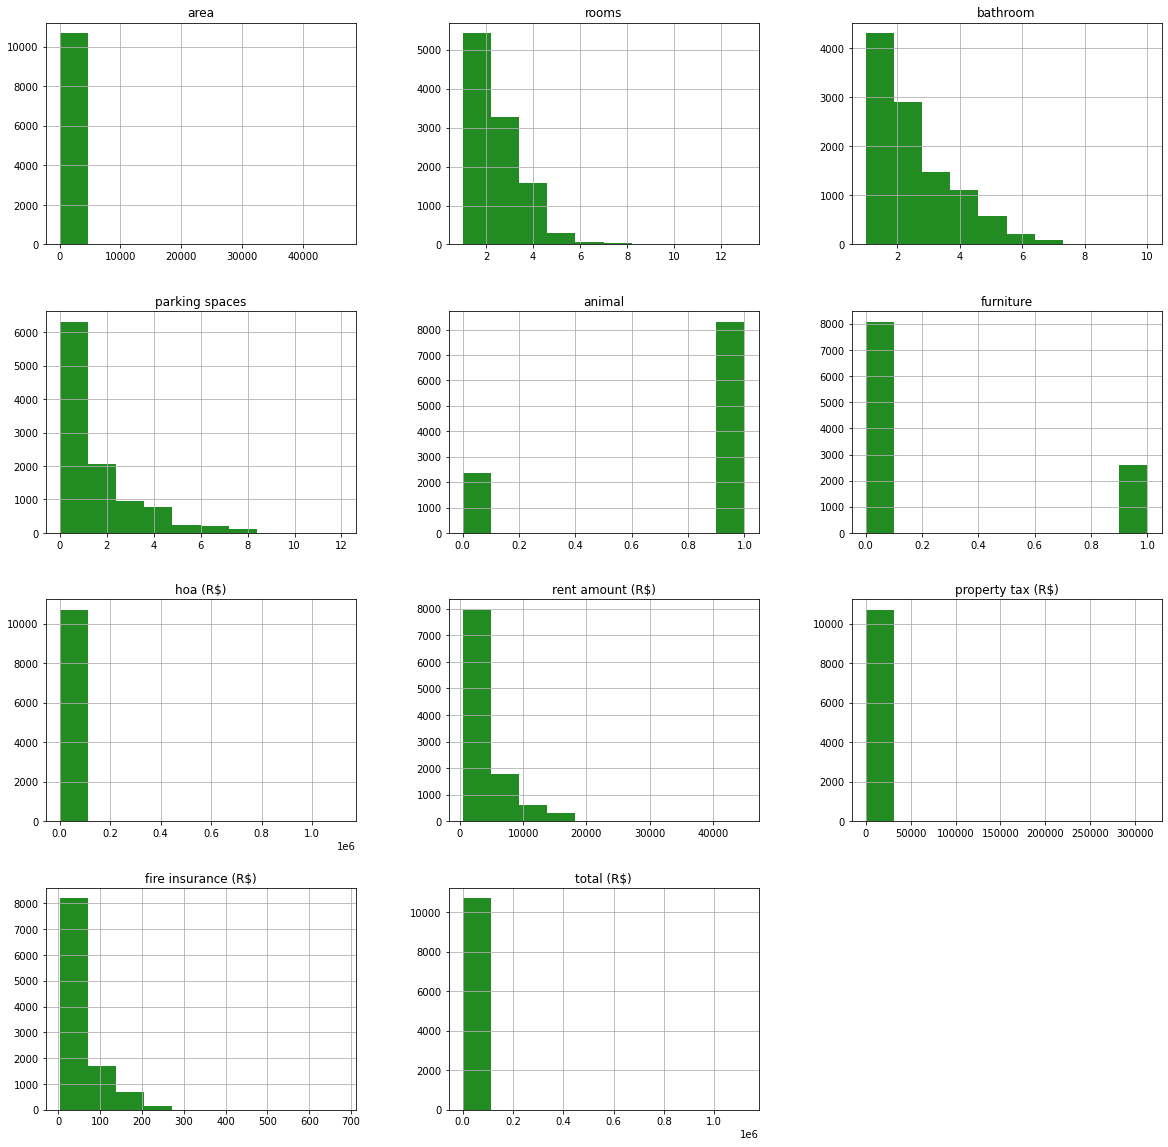

In [182]:
df.hist(figsize=(20,20), color = "forestgreen")
plt.show()

In [183]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(random_state = 0).fit(df)
df_outcome = pd.DataFrame()



df_outcome ['score'] = iso.decision_function(df)
df_outcome ['anomaly'] = iso.predict(df)


#df_outcome.head(20)

df_result = pd.concat([df,df_outcome], axis=1, join='inner')
df_result.head(20)


,area,rooms,bathroom,parking spaces,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),score,anomaly
0,70,2,1,1,1,1,2065,3300,211,42,5618,0.026740,1
1,320,4,4,0,1,0,1200,4960,1750,63,7973,0.010042,1
2,80,1,1,1,1,0,1000,2800,0,41,3841,0.091980,1
3,51,2,1,0,1,0,270,1112,22,17,1421,0.115582,1
4,25,1,1,0,0,0,0,800,25,11,836,0.055359,1
5,376,3,3,7,1,0,0,8000,834,121,8955,-0.010438,-1
6,72,2,1,0,1,0,740,1900,85,25,2750,0.112839,1
7,213,4,4,4,1,0,2254,3223,1735,41,7253,0.014449,1
8,152,2,2,1,1,1,1000,15000,250,191,16440,-0.104957,-1
9,35,1,1,0,1,1,590,2300,35,30,2955,0.065813,1


In [184]:
anomaly = df_result.loc[df_result['anomaly'] == -1]
anomaly_index=list(anomaly.index)

print(anomaly)

       area  rooms  bathroom  ...  total (R$)     score  anomaly
5       376      3         3  ...        8955 -0.010438       -1
8       152      2         2  ...       16440 -0.104957       -1
15      330      4         6  ...        9129 -0.044050       -1
17       88      2         3  ...        5351 -0.009453       -1
19      600      4         5  ...       21680 -0.157391       -1
...     ...    ...       ...  ...         ...       ...      ...
10681   230      3         5  ...       16040 -0.087444       -1
10686   150      3         3  ...       13670 -0.090601       -1
10688   285      4         4  ...       19260 -0.062034       -1
10689    70      3         3  ...        7390 -0.019095       -1
10690   120      2         2  ...       14020 -0.051478       -1

[1945 rows x 13 columns]
